In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.3.1
sys.version_info(major=3, minor=6, micro=7, releaselevel='final', serial=0)
matplotlib 3.3.2
numpy 1.18.4
pandas 1.1.4
sklearn 0.23.2
tensorflow 2.3.1
tensorflow.keras 2.4.0


In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

xtrain_all, xtest, ytrain_all, ytest = train_test_split(
    housing.data, housing.target, random_state=7)
xtrain, xvalid, ytrain, yvalid = train_test_split(
    xtrain_all ,ytrain_all, random_state=11)
print(xtrain.shape, ytrain.shape)
print(xvalid.shape, yvalid.shape)
print(xtest.shape, ytest.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xvalid_scaled= scaler.transform(xvalid)
xtest_scaled = scaler.transform(xtest)

In [5]:
def customized_mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))

model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=xtrain.shape[1:]),
    keras.layers.Dense(1),
])
model.summary()
model.compile(loss=customized_mse, optimizer='sgd',
              metrics=["mean_squared_error"])
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-5)]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(xtrain_scaled, ytrain, 
                    validation_data=(xvalid_scaled, yvalid),
                    epochs=100, callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.3659 - mean_squared_error: 1.3659 - val_loss: 0.8878 - val_mean_squared_error: 0.8878
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 201.8695 - mean_squared_error: 201.8695 - val_loss: 5.6765 - val_mean_squared_error: 5.6765
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 1.4473 - mean_squared_error: 1.4473 - val_loss: 0.9647 - val_mean_squared_error: 0.9647
Epoch 4/100
363/363 [==============================] - 0s 876us/step - loss: 0.5957 - mean_squared_error: 0.5957 - val_loss: 0.6059 - val_mean_squared_error: 0.6059
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4861 - mean_squared_error: 0.4861 - val_loss: 0.5235 - val_mean_squared_error: 0.5235
Epoch 6/100
363/363 [==============================] - 0s 930us/step - loss: 0.4493 - mean_squared_error: 0.4493 - val_loss: 0.4736 - val_mean_squared_error: 0.4736
Epoch 7/100
36

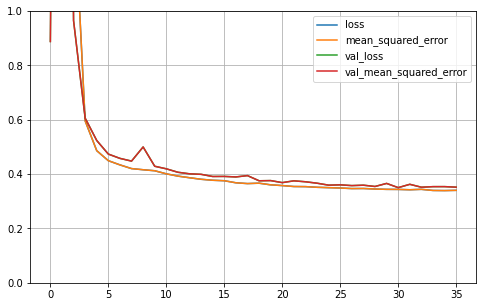

In [7]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

In [8]:
model.evaluate(xtest_scaled, ytest, verbose=0)

[0.3618049621582031, 0.3618049621582031]